**“Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.” —John Tukey**

In [206]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Houston Weather Data - 1973 to 2017

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [208]:
dfR = pd.read_csv('dfR.csv', index_col='date',parse_dates=True)
dfR.head()

,rain,year,month,week,day,hour,pressure,temp,dew_pt,wind_spd,dir,vis,fog,thunder,precip,cond,season
date,,,,,,,,,,,,,,,,,
1973-01-01 00:00:00,0,1973,Jan,1,1,0,30.12,54.0,35.1,9.2,ENE,15.0,0,0,0.0,Unknown,Winter
1973-01-01 01:00:00,0,1973,Jan,1,1,1,30.12,55.0,36.0,11.5,ENE,15.0,0,0,0.0,Unknown,Winter
1973-01-01 02:00:00,0,1973,Jan,1,1,2,30.09,54.0,36.0,11.5,ENE,15.0,0,0,0.0,Unknown,Winter
1973-01-01 03:00:00,0,1973,Jan,1,1,3,30.12,54.0,35.1,17.3,ENE,15.0,0,0,0.0,Unknown,Winter
1973-01-01 04:00:00,0,1973,Jan,1,1,4,30.12,54.0,35.1,9.2,East,15.0,0,0,0.0,Light Drizzle,Winter


## Empirical cumulative distribution function (ECDF)

In [209]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Plotting the ECDF

### The ECDFs for the Houston Temperatures Differentiated by Seasons

The ecdf() function is utilized to compute the ECDFs for the Houston temperature differentiated by seasons, and the ECDFs are plotted below.

In [210]:
pd.unique(dfR['season'])

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [211]:
# Subset temp data by the seasons
winter = dfR[dfR['season']=='Winter']
winter = winter['temp']
spring = dfR[dfR['season']=='Spring']
spring = spring['temp']
summer = dfR[dfR['season']=='Summer']
summer = summer['temp']
fall = dfR[dfR['season']=='Fall']
fall = fall['temp']

In [212]:
# Compute ECDFs
x_wi, y_wi = ecdf(winter)
x_sp, y_sp = ecdf(spring)
x_su, y_su = ecdf(summer)
x_fa, y_fa = ecdf(fall)

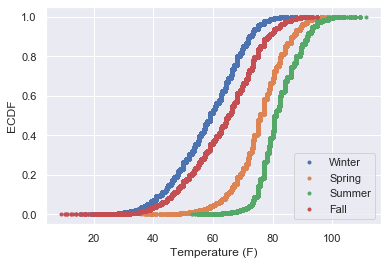

In [213]:
# Plot all ECDFs on the same plot
_= plt.plot(x_wi, y_wi, marker='.', linestyle='none')
_= plt.plot(x_sp, y_sp, marker='.', linestyle='none')
_= plt.plot(x_su, y_su, marker='.', linestyle='none')
_= plt.plot(x_fa, y_fa, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('Winter', 'Spring', 'Summer','Fall'), loc='lower right')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

 ### ECDFs for the Houston temperature Differentiated by Decades

In [214]:
# Subset temp data by decades
the1970s = dfR.loc['1973':'1979']
the1970s = the1970s['temp']
the1980s = dfR.loc['1980':'1989']
the1980s = the1980s['temp']
the1990s = dfR.loc['1990':'1999']
the1990s = the1990s['temp']
the2000s = dfR.loc['2000':'2009']
the2000s = the2000s['temp']
the2010s = dfR.loc['2010':'2017']
the2010s = the2010s['temp']

In [215]:
# Compute ECDFs
x_70, y_70 = ecdf(the1970s)
x_80, y_80 = ecdf(the1980s)
x_90, y_90 = ecdf(the1990s)
x_20, y_20 = ecdf(the2000s)
x_21, y_21 = ecdf(the2010s)

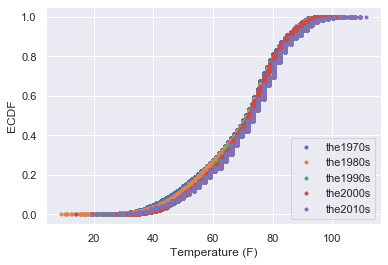

In [216]:
# Plot all ECDFs on the same plot
_= plt.plot(x_70, y_70, marker='.', linestyle='none')
_= plt.plot(x_80, y_80, marker='.', linestyle='none')
_= plt.plot(x_90, y_90, marker='.', linestyle='none')
_= plt.plot(x_20, y_20, marker='.', linestyle='none')
_= plt.plot(x_21, y_21, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('the1970s', 'the1980s', 'the1990s','the2000s','the2010s'), loc='lower right')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Temperature Autocorrelation

### Temperature Autocorrelation by Week

The autocorrelation of weekly averages of temperatures from 1973 to 2017. 

In [217]:
# Convert the hourly data to weekly average data
dfR_wkavg = dfR['temp'].resample('W').mean()  
dfR_wkavg.head()

date
1973-01-07    49.398193
1973-01-14    35.998780
1973-01-21    60.815000
1973-01-28    50.210843
1973-02-04    54.030921
Freq: W-SUN, Name: temp, dtype: float64

In [218]:
# Compute the percentage change of temperatures
Tperchg = dfR_wkavg.pct_change()
Tperchg.head()

date
1973-01-07         NaN
1973-01-14   -0.271253
1973-01-21    0.689363
1973-01-28   -0.174367
1973-02-04    0.076081
Freq: W-SUN, Name: temp, dtype: float64

In [219]:
# Compute and print the autocorrelation of % change of temperatures
autocorrelation = Tperchg.autocorr()
print("The autocorrelation of weekly % change of temperatures is ", round(autocorrelation,2))

The autocorrelation of weekly % change of temperatures is  -0.33


### Quarterly Average Temperatures

Compute the array of autocorrelations for the Houston mean quarterly temperatures from 1973 to 2017.

In [220]:
# Down sample hourly temperatures to quarterly means
TqAvg = dfR['temp'].resample('Q').mean()
TqAvg

date
1973-03-31    55.911669
1973-06-30    73.495227
1973-09-30    80.538871
1973-12-31    65.709977
1974-03-31    60.968630
                ...    
2016-12-31    67.862697
2017-03-31    65.220960
2017-06-30    76.732559
2017-09-30    83.683104
2017-12-31    67.219555
Freq: Q-DEC, Name: temp, Length: 180, dtype: float64

In [221]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [223]:
# Compute and print the autocorrelation of Quarterly Temperatures - Lag 2
autocorrelation = TqAvg.autocorr(lag=2)
print("The Lag 2 autocorrelation of Quarterly Temperatures is %4.2f" %(autocorrelation))

The Lag 2 autocorrelation of Quarterly Temperatures is -0.94


That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are the autocorrelations at other lags that are significantly different from zero?

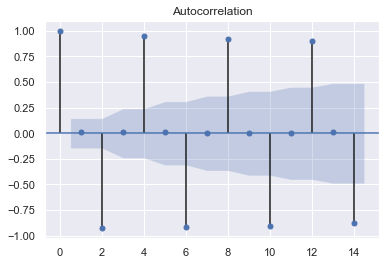

In [224]:
# Plot the autocorrelation function with 95% confidence intervals and 14 lags
_= plot_acf(TqAvg, alpha=0.05, lags=14)
_= plt.show()

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.  
Notice the strong positive/negative autocorrelations at lags 2, 4, 6, 8, 10, ...etc.  
All even number of lags are significantly different from zero.

### Seasonal Adjustment of Quarterly Temperatures

_"Seasonal adjustment is a statistical method for removing the seasonal component of a time series that exhibits a seasonal pattern. It is usually done when wanting to analyse the trend, and cyclical deviations from trend, of a time series independently of the seasonal components."_  - Wikipedia

Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

In [225]:
# Seasonally adjust quarterly earnings
TqAvgsa = TqAvg.diff(periods = 4)
# Print the first 10 rows of the seasonally adjusted series
print(TqAvgsa.head(10))

date
1973-03-31         NaN
1973-06-30         NaN
1973-09-30         NaN
1973-12-31         NaN
1974-03-31    5.056961
1974-06-30    2.312284
1974-09-30   -0.993994
1974-12-31   -2.602505
1975-03-31   -1.386382
1975-06-30   -0.324280
Freq: Q-DEC, Name: temp, dtype: float64


In [226]:
# Drop the NaN data in the first four rows
TqAvgsa = TqAvgsa.dropna()
# Print the first 10 rows of the seasonally adjusted series
print(TqAvgsa.head(10))

date
1974-03-31    5.056961
1974-06-30    2.312284
1974-09-30   -0.993994
1974-12-31   -2.602505
1975-03-31   -1.386382
1975-06-30   -0.324280
1975-09-30   -0.068070
1975-12-31   -1.301815
1976-03-31   -0.704560
1976-06-30   -1.950791
Freq: Q-DEC, Name: temp, dtype: float64


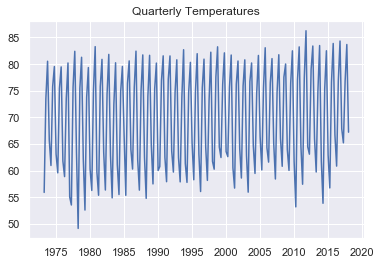

In [227]:
_= plt.plot(TqAvg)
_= plt.title('Quarterly Temperatures')
plt.show()

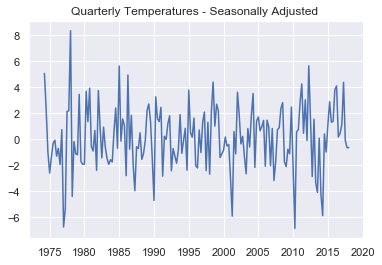

In [228]:
_= plt.plot(TqAvgsa)
_= plt.title('Quarterly Temperatures - Seasonally Adjusted ')
plt.show()

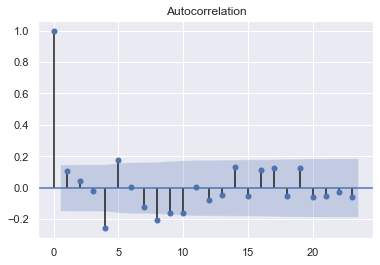

In [229]:
# Plot the autocorrelation function of the seasonally adjusted series
_= plot_acf(TqAvgsa)
plt.show()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function

### Are Monthly Average Temperatures a Random Walk

In [230]:
# Down sample hourly temperatures to monthly means
TmAvg = dfR['temp'].resample('M').mean()
TmAvg

date
1973-01-31    49.190646
1973-02-28    52.646802
1973-03-31    65.564454
1973-04-30    65.572581
1973-05-31    74.870391
                ...    
2017-08-31    83.503710
2017-09-30    81.194689
2017-10-31    74.007303
2017-11-30    68.401524
2017-12-31    56.453077
Freq: M, Name: temp, Length: 540, dtype: float64

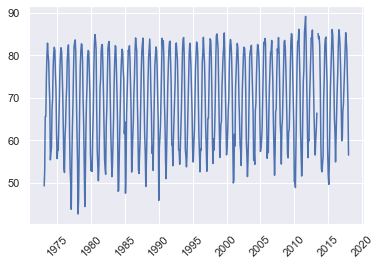

In [231]:
_= plt.plot(TmAvg)
_= plt.xticks(rotation=45)
plt.show()

In [232]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

In [233]:
# Run the ADF test on the monthly temperature series and print out the results
results = adfuller(TmAvg.dropna())
# Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value)
print('The p-value of the test on temperatures is: ' + str(results[1]))

The p-value of the test on temperatures is: 0.024987351494066803


According to this test, we can reject the hypothesis that monthly temperatures follow a random walk.

### Autocorrelation of Monthly Temperatures

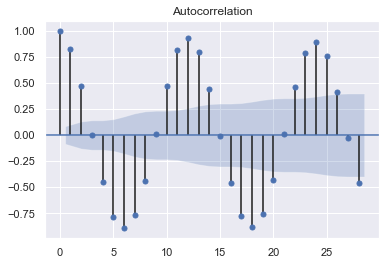

In [234]:
# Plot the autocorrelation function with 95% confidence intervals and 28 lags
_= plot_acf(TmAvg.dropna(), alpha=0.05)
_= plt.show()

The strongest positive/negative autocorrelations are at lags 6,12,18....etc, and they are significantly different from zero.

### Seasonal Adjustment of Monthly Temperatures

In [235]:
# Seasonally adjust monthly earnings
TmAvgsa = TmAvg.diff(periods = 12).dropna()
# Print the first 20 rows of the seasonally adjusted series
print(TmAvgsa.head(20))

date
1974-01-31    7.931402
1974-02-28    5.484920
1974-03-31    1.741909
1974-04-30    3.952238
1974-05-31    2.424900
1974-06-30    0.582702
1974-07-31   -1.006186
1974-08-31    1.076350
1974-09-30   -3.146465
1974-10-31   -1.022789
1974-11-30   -7.308729
1974-12-31    0.284064
1975-01-31    0.732039
1975-02-28   -0.538908
1975-03-31   -4.180578
1975-04-30   -0.124963
1975-05-31   -0.586251
1975-06-30   -0.209348
1975-07-31   -0.096426
1975-08-31   -0.420909
Name: temp, dtype: float64


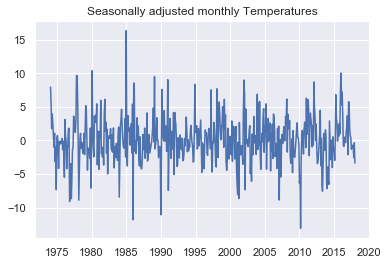

In [236]:
_= plt.plot(TmAvgsa)
_= plt.title('Seasonally adjusted monthly Temperatures')
plt.show()

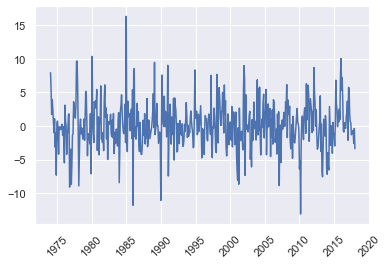

In [237]:
_= plt.plot(TmAvgsa)
#_= plt.xlim('2000','2003')
_= plt.xticks(rotation=45)
plt.show()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function below.

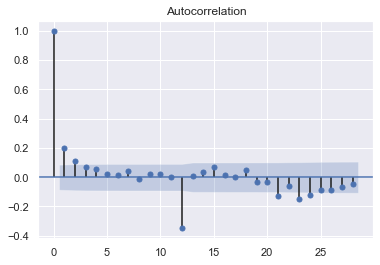

In [238]:
# Plot the autocorrelation function of the seasonally adjusted series
_= plot_acf(TmAvgsa)
plt.show()

### Are Seasonally Adjusted Monthly Temperatures a Random Walk

In [239]:
# Run the ADF test on the monthly temperature series and print out the results
results = adfuller(TmAvgsa.dropna())
# Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value)
print('The p-value of the test on temperatures is: ' + str(results[1]))

The p-value of the test on temperatures is: 3.83046249488727e-06


According to this test, we can reject the hypothesis that seasonally adjusted monthly temperatures follow a random walk.

## Is Temperature Correlated with Pressure

### Daily Averages

Here, we look to see if percent changes in temperature and pressure daily averages for data from 1973 to 2017 are correlated

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why we look at the percent changes and not their levels when calculating correlations

In [240]:
# Convert the hourly data to daily average data
dfR_dTavg = dfR['temp'].resample('D').mean()
dfR_dPavg = dfR['pressure'].resample('D').mean()
dfR_dTavg.head()
dfR_dPavg.head()

date
1973-01-01    47.166667
1973-01-02    45.508333
1973-01-03    51.429167
1973-01-04    52.808333
1973-01-05    59.577273
Freq: D, Name: temp, dtype: float64

date
1973-01-01    30.152917
1973-01-02    30.063750
1973-01-03    29.971250
1973-01-04    30.120417
1973-01-05    29.997273
Freq: D, Name: pressure, dtype: float64

In [241]:
# Compute percent changes
changesT = dfR_dTavg.pct_change()
changesP = dfR_dPavg.pct_change()
changesT.head()
changesP.head()

date
1973-01-01         NaN
1973-01-02   -0.035159
1973-01-03    0.130104
1973-01-04    0.026817
1973-01-05    0.128179
Freq: D, Name: temp, dtype: float64

date
1973-01-01         NaN
1973-01-02   -0.002957
1973-01-03   -0.003077
1973-01-04    0.004977
1973-01-05   -0.004088
Freq: D, Name: pressure, dtype: float64

In [242]:
# Compute correlation of percent changes
correlationTP = changesT.corr(changesP)
print("Correlation of changes: ", round(correlationTP,2))

Correlation of changes:  -0.61


Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

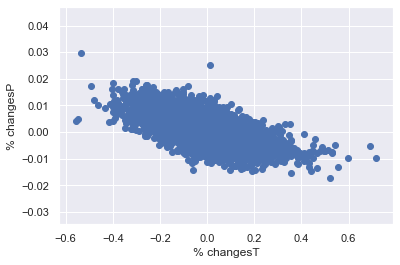

In [243]:
# Make scatter plot
_= plt.scatter(changesT,changesP)
_= plt.xlabel('% changesT')
_= plt.ylabel('% changesP')
plt.show()

### Hourly Averages

In [244]:
# Compute percent changes
changesT = dfR['temp'].pct_change()
changesP = dfR['pressure'].pct_change()
changesT.head()
changesP.head()

date
1973-01-01 00:00:00         NaN
1973-01-01 01:00:00    0.018519
1973-01-01 02:00:00   -0.018182
1973-01-01 03:00:00    0.000000
1973-01-01 04:00:00    0.000000
Name: temp, dtype: float64

date
1973-01-01 00:00:00         NaN
1973-01-01 01:00:00    0.000000
1973-01-01 02:00:00   -0.000996
1973-01-01 03:00:00    0.000997
1973-01-01 04:00:00    0.000000
Name: pressure, dtype: float64

In [245]:
# Compute correlation of percent changes
correlationTP = changesT.corr(changesP)
print("Correlation of changes: ", round(correlationTP,3))

Correlation of changes:  -0.097


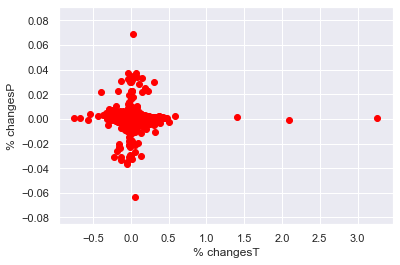

In [246]:
# Make scatter plot
_= plt.scatter(changesT,changesP,color='red')
_= plt.xlabel('% changesT')
_= plt.ylabel('% changesP')
plt.show()

## Is Temperature Correlated with Dew-Point Temperature

### Daily Averages

In [247]:
# Convert the hourly data to daily average data
dfR_dTavg = dfR['temp'].resample('D').mean()
dfR_dTDavg = dfR['dew_pt'].resample('D').mean()
dfR_dTavg.head()
dfR_dTDavg.head()

date
1973-01-01    47.166667
1973-01-02    45.508333
1973-01-03    51.429167
1973-01-04    52.808333
1973-01-05    59.577273
Freq: D, Name: temp, dtype: float64

date
1973-01-01    40.954167
1973-01-02    42.420833
1973-01-03    43.683333
1973-01-04    43.804167
1973-01-05    57.363636
Freq: D, Name: dew_pt, dtype: float64

In [248]:
# Compute percent changes
changesT = dfR_dTavg.pct_change()
changesTD = dfR_dTDavg.pct_change()
changesT.head()
changesTD.head()

date
1973-01-01         NaN
1973-01-02   -0.035159
1973-01-03    0.130104
1973-01-04    0.026817
1973-01-05    0.128179
Freq: D, Name: temp, dtype: float64

date
1973-01-01         NaN
1973-01-02    0.035812
1973-01-03    0.029761
1973-01-04    0.002766
1973-01-05    0.309547
Freq: D, Name: dew_pt, dtype: float64

In [249]:
# Compute correlation of percent changes
correlationTT = changesT.corr(changesTD)
print("Correlation of changes: ", round(correlationTT,3))

Correlation of changes:  0.702


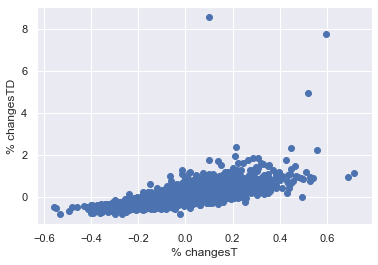

In [250]:
# Make scatter plot
_= plt.scatter(changesT,changesTD)
_= plt.xlabel('% changesT')
_= plt.ylabel('% changesTD')
plt.show()

Autocorrelation describes correlation of a variable with itself given a time lag.  
Autocorrelation Function (ACF): The autocorrelation as a function of the lag.  
Equals one at lag-zero.  
Interesting information beyond lag-one.  

### Hourly Averages

In [251]:
# Compute percent changes
changesT = dfR['temp'].pct_change()
changesTD = dfR['dew_pt'].pct_change()
changesT.head()
changesTD.head()

date
1973-01-01 00:00:00         NaN
1973-01-01 01:00:00    0.018519
1973-01-01 02:00:00   -0.018182
1973-01-01 03:00:00    0.000000
1973-01-01 04:00:00    0.000000
Name: temp, dtype: float64

date
1973-01-01 00:00:00         NaN
1973-01-01 01:00:00    0.025641
1973-01-01 02:00:00    0.000000
1973-01-01 03:00:00   -0.025000
1973-01-01 04:00:00    0.000000
Name: dew_pt, dtype: float64

In [252]:
# Compute correlation of percent changes
correlationTT = changesT.corr(changesTD)
print("Correlation of changes: ", round(correlationTT,3))

Correlation of changes:  0.052


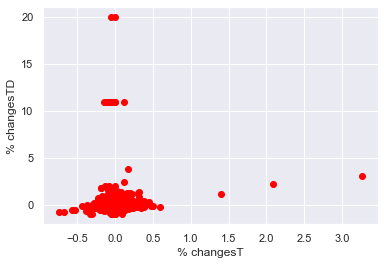

In [253]:
# Make scatter plot
_= plt.scatter(changesT,changesTD,color ='red')
_= plt.xlabel('% changesT')
_= plt.ylabel('% changesTD')
plt.show()